In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
ratings=pd.read_csv('ml-latest-small/ratings.csv',usecols=['userId','movieId','rating'])
titles=pd.read_csv('ml-latest-small/movies.csv',usecols=['movieId','title'])

In [3]:
print(ratings.head())
titles.head()

   userId  movieId  rating
0       1        1     4.0
1       1        3     4.0
2       1        6     4.0
3       1       47     5.0
4       1       50     5.0


,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [4]:
movie=ratings.merge(titles,on='movieId')

In [5]:
movie.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)


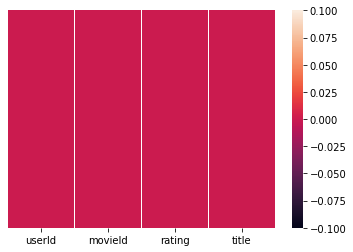

In [6]:
sb.heatmap(movie.isnull(),yticklabels=False)

In [7]:
movie.isnull().sum()

userId     0
movieId    0
rating     0
title      0
dtype: int64

In [8]:
movie_ratingCount=movie.groupby('title')['rating'].count().reset_index()

In [9]:
movie_ratingCount.head()

,title,rating
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2


In [10]:
movie_ratingCount=movie_ratingCount.rename(columns={"rating":"rating_count"})

In [11]:
movie_ratingCount.head()

,title,rating_count
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2


In [12]:
df=movie.merge(movie_ratingCount, on='title')
df.head()

,userId,movieId,rating,title,rating_count
0,1,1,4.0,Toy Story (1995),215
1,5,1,4.0,Toy Story (1995),215
2,7,1,4.5,Toy Story (1995),215
3,15,1,2.5,Toy Story (1995),215
4,17,1,4.5,Toy Story (1995),215


In [13]:
df['rating_count'].describe()

count    100836.000000
mean         58.758777
std          61.965384
min           1.000000
25%          13.000000
50%          39.000000
75%          84.000000
max         329.000000
Name: rating_count, dtype: float64

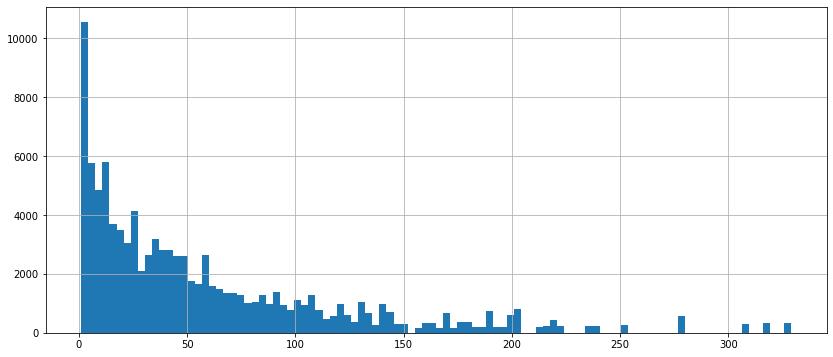

In [14]:
plt.figure(figsize=(14,6))
df['rating_count'].hist(bins=100)

In [15]:
popularity_threshold=40
popular_movie=df.query('rating_count >= @popularity_threshold')
popular_movie.head()

,userId,movieId,rating,title,rating_count
0,1,1,4.0,Toy Story (1995),215
1,5,1,4.0,Toy Story (1995),215
2,7,1,4.5,Toy Story (1995),215
3,15,1,2.5,Toy Story (1995),215
4,17,1,4.5,Toy Story (1995),215


In [16]:
movie_pivot=popular_movie.pivot_table(index='title',columns='userId',values="rating").fillna(0)
movie_pivot.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
(500) Days of Summer (2009),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians (1996),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians (One Hundred and One Dalmatians) (1961),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
from scipy.sparse import csr_matrix
movie_matrix=csr_matrix(movie_pivot.values)
from sklearn.neighbors import NearestNeighbors
nn=NearestNeighbors(metric='cosine',algorithm='brute')
nn.fit(movie_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [18]:
index=np.random.choice(movie_pivot.shape[0])
index

393

In [19]:
distances,indices=nn.kneighbors(movie_pivot.iloc[index,:].values.reshape(1,-1),n_neighbors=6)

In [20]:
Distance=distances.flatten()
Index=indices.flatten()

In [21]:
for i in range(len(Distance)):
    if i==0:
        print('Recomendation of movie {0} :\n'.format(movie_pivot.index[index]))
    else:
        print('{0} {1} has distance of     :{2}, \n'.format(i, movie_pivot.index[Index[i]],Distance[i]))

Recomendation of movie Much Ado About Nothing (1993) :

1 Don Juan DeMarco (1995) has distance of     :0.5371208664079455, 

2 American President, The (1995) has distance of     :0.5964704815116187, 

3 Sleepless in Seattle (1993) has distance of     :0.6038588255290687, 

4 Dave (1993) has distance of     :0.6046108870961777, 

5 Nightmare Before Christmas, The (1993) has distance of     :0.6196982227455503, 

